In [7]:
import networkx as nx
import random

# ネットワークを作成
G = nx.DiGraph()
G.add_nodes_from(['a' + str(i) for i in range(1, 101)])
pos = {}
for i in range(1, 101):
    pos['a' + str(i)] = (i - 1, 0)

# a1からa2,a3,a4、a2からa3,a4,a5など、三パターン進めるように変更
for i in range(1, 98):
    for j in range(1, 4):
        G.add_edge(f'a{i}', f'a{min(i+j,100)}')
G.add_node('b11')
G.add_edge('a10', 'b11')
pos['b11'] = (10, 1)
for i in range(11, 99):
    G.add_node('b' + str(i + 1))
    for j in range(1, 4):
        G.add_edge(f'b{i}', f'b{min(i+j,99)}')
    pos['b' + str(i + 1)] = (i, 1)
G.add_edge('b99', 'a100')

# b25からc26へ枝分かれ
G.add_node('c26')
G.add_edge('b25', 'c26')
pos['c26'] = (25, 2)
for i in range(26, 99):
    G.add_node('c' + str(i + 1))
    for j in range(1, 4):
        G.add_edge(f'c{i}', f'c{min(i+j,99)}')
    pos['c' + str(i + 1)] = (i, 2)
G.add_edge('c99', 'a100')

# c50からd51へ枝分かれ
G.add_node('d51')
G.add_edge('c50', 'd51')
pos['d51'] = (50, 3)
for i in range(51, 99):
    G.add_node('d' + str(i + 1))
    for j in range(1, 4):
        G.add_edge(f'd{i}', f'd{min(i+j,99)}')
    pos['d' + str(i + 1)] = (i, 3)
G.add_edge('d99', 'a100')

# d75からe76へ枝分かれ
G.add_node('e76')
G.add_edge('d75', 'e76')
pos['e76'] = (75, 4)
for i in range(76, 99):
    G.add_node('e' + str(i + 1))
    for j in range(1, 4):
        G.add_edge(f'e{i}', f'e{min(i+j,99)}')
    pos['e' + str(i + 1)] = (i, 4)
G.add_edge('e99', 'a100')

G.add_edge('b20', 'a21')
G.add_edge('a30', 'b31')
G.add_edge('c35', 'b36')
G.add_edge('c45', 'a46')
G.add_edge('b40', 'a41')
G.add_edge('b50', 'c51')
G.add_edge('a55', 'd56')
G.add_edge('c60', 'd61')
G.add_edge('b65', 'c66')
G.add_edge('b70', 'a71')
G.add_edge('d70', 'b71')
G.add_edge('c75', 'b76')
G.add_edge('d80', 'c81')
G.add_edge('a80', 'b81')
G.add_edge('c85', 'a86')
G.add_edge('e90', 'd91')
G.add_edge('b90', 'c91')
G.add_edge('b95', 'd96')


In [8]:
def branch(bef_str, bef_num, aft_str, aft_num):
  before = str(bef_str + str(bef_num))
  after = str(aft_str + str(aft_num))
  G.add_edge(str(bef_str + str(bef_num - 2)), after)
  G.add_edge(str(bef_str + str(bef_num - 1)), after)
  G.add_edge(str(bef_str + str(bef_num - 1)), str(aft_str + str(aft_num + 1)))
  G.add_edge(before, str(aft_str + str(aft_num + 1)))
  G.add_edge(before, str(aft_str + str(aft_num + 2)))


branch('a',10,'b',11)
branch('b',20,'a',21)
branch('b',25,'c',26)
branch('a',30,'b',31)
branch('a',10,'b',11)
branch('c',35,'b',36)
branch('b',40,'a',41)
branch('c',45,'a',46)
branch('b',50,'c',51)
branch('c',50,'d',51)
branch('a',55,'d',56)
branch('c',60,'d',61)
branch('b',65,'c',66)
branch('b',70,'a',71)
branch('d',70,'b',71)
branch('c',75,'b',76)
branch('d',75,'e',76)
branch('a',80,'b',81)
branch('d',80,'c',81)
branch('c',85,'a',86)
branch('b',90,'c',91)
branch('e',90,'d',91)
branch('b',95,'d',96)
G.add_edge('a97','a100')
G.add_edge('a98','a100')
G.add_edge('a99','a100')
G.add_edge('b97','a100')
G.add_edge('b98','a100')
G.add_edge('b99','a100')
G.add_edge('c97','a100')
G.add_edge('c98','a100')
G.add_edge('c99','a100')
G.add_edge('d97','a100')
G.add_edge('d98','a100')
G.add_edge('d99','a100')
G.add_edge('e97','a100')
G.add_edge('e98','a100')
G.add_edge('e99','a100')

In [9]:
# # 各ノードに-10~10までの重みづけをランダムに行う
# weights = {}
# for node in G.nodes():
#     weights[node] = random.randint(-10, 10)

In [10]:
weights = {}
for node in G.nodes():
    # ノードの名前の最初の文字を取得する
    prefix = node[0]
    # ノードの名前によって重みの範囲を決める
    if prefix == "a":
        # a1~a100までのノードは0~3までの重みづけをランダムで
        min_weight = 0
        max_weight = 2
    elif prefix == "b":
        # b11~b99までのノードは-5~5までの重みづけをランダムで
        min_weight = -5
        max_weight = 5
    elif prefix == "c":
        # c26~c99までのノードは-8~-5,5~8までの重みづけをランダムで
        # -8~-5と5~8の間にはギャップがあるため、確率的に分ける必要がある
        if random.random() < 0.5: # 50%の確率で-8~-5の範囲を選ぶ
            min_weight = -8
            max_weight = -5
        else: # 50%の確率で5~8の範囲を選ぶ
            min_weight = 5
            max_weight = 8
    elif prefix == "d":
        # d51~d99までのノードは-10~-8,8~10までの重みづけをランダムで
        # -10~-8と8~10の間にはギャップがあるため、確率的に分ける必要がある
        if random.random() < 0.5: # 50%の確率で-10~-8の範囲を選ぶ
            min_weight = -10
            max_weight = -8
        else: # 50%の確率で8~10の範囲を選ぶ
            min_weight = 8
            max_weight = 10
    elif prefix == "e":
        # e76~e99までのノードは-15~-10,10~15までの重みづけをランダムで
        # -15~-10と10~15の間にはギャップがあるため、確率的に分ける必要がある
        if random.random() < 0.5: # 50%の確率で-15~-10の範囲を選ぶ
            min_weight = -15
            max_weight = -10
        else: # 50%の確率で10~15の範囲を選ぶ
            min_weight = 10
            max_weight = 15
    else:
        # それ以外のノードは-10~10までの重みづけをランダムで（元のコードと同じ）
        min_weight = -10
        max_weight = 10
    # 指定した範囲からランダムな整数を生成する
    weights[node] = random.randint(min_weight, max_weight)


In [11]:
# ノードの重みを取得する
for node in G.nodes():
    print(f'ノード{node}の重みは{weights[node]}です。')

ノードa1の重みは1です。
ノードa2の重みは0です。
ノードa3の重みは2です。
ノードa4の重みは2です。
ノードa5の重みは1です。
ノードa6の重みは0です。
ノードa7の重みは1です。
ノードa8の重みは2です。
ノードa9の重みは1です。
ノードa10の重みは0です。
ノードa11の重みは0です。
ノードa12の重みは0です。
ノードa13の重みは1です。
ノードa14の重みは1です。
ノードa15の重みは1です。
ノードa16の重みは0です。
ノードa17の重みは0です。
ノードa18の重みは2です。
ノードa19の重みは1です。
ノードa20の重みは1です。
ノードa21の重みは2です。
ノードa22の重みは0です。
ノードa23の重みは2です。
ノードa24の重みは2です。
ノードa25の重みは2です。
ノードa26の重みは0です。
ノードa27の重みは2です。
ノードa28の重みは1です。
ノードa29の重みは2です。
ノードa30の重みは1です。
ノードa31の重みは0です。
ノードa32の重みは0です。
ノードa33の重みは1です。
ノードa34の重みは1です。
ノードa35の重みは0です。
ノードa36の重みは2です。
ノードa37の重みは2です。
ノードa38の重みは2です。
ノードa39の重みは2です。
ノードa40の重みは2です。
ノードa41の重みは2です。
ノードa42の重みは0です。
ノードa43の重みは0です。
ノードa44の重みは0です。
ノードa45の重みは2です。
ノードa46の重みは2です。
ノードa47の重みは1です。
ノードa48の重みは2です。
ノードa49の重みは0です。
ノードa50の重みは2です。
ノードa51の重みは1です。
ノードa52の重みは0です。
ノードa53の重みは1です。
ノードa54の重みは1です。
ノードa55の重みは1です。
ノードa56の重みは1です。
ノードa57の重みは2です。
ノードa58の重みは2です。
ノードa59の重みは1です。
ノードa60の重みは2です。
ノードa61の重みは2です。
ノードa62の重みは1です。
ノードa63の重みは0です。
ノードa64の重みは0です。
ノードa65の重みは2です。
ノードa66の重みは2です。
ノードa67の重みは1です。
ノードa

In [12]:
# モンテカルロ法で最大期待値の経路を求める
def monte_carlo(G, weights, start, goal, n):
    # n回のランダムウォークを行う
    max_weight = 0 # 最大の重み
    max_path = [] # 最大の重みを持つ経路
    for i in range(n):
        current = start # 現在のノード
        weight = 0 # 現在の重み
        path = [start] # 現在の経路
        while current != goal: # ゴールに到達するまで繰り返す
            # 隣接するノードの中からランダムに選ぶ
            neighbors = list(G[current])
            next = random.choice(neighbors)
            # 重みと経路を更新する
            weight += weights[next]
            path.append(next)
            current = next
        # 最大の重みと経路を記録する
        if weight > max_weight:
            max_weight = weight
            max_path = path
    return max_weight, max_path

In [15]:
#最大得点と、その時の経路を表示
print(monte_carlo(G, weights, 'a1', 'a100', 20000))

(144, ['a1', 'a2', 'a3', 'a5', 'a7', 'a9', 'b11', 'b14', 'b17', 'b20', 'b23', 'c26', 'c27', 'c29', 'c32', 'c34', 'c36', 'c39', 'c40', 'c41', 'c42', 'c43', 'a46', 'a47', 'a49', 'a50', 'a53', 'd56', 'd57', 'd60', 'd62', 'd63', 'd65', 'd68', 'd70', 'd72', 'd75', 'e77', 'e79', 'e82', 'e84', 'e87', 'e89', 'e92', 'e94', 'e95', 'e96', 'e98', 'a100'])


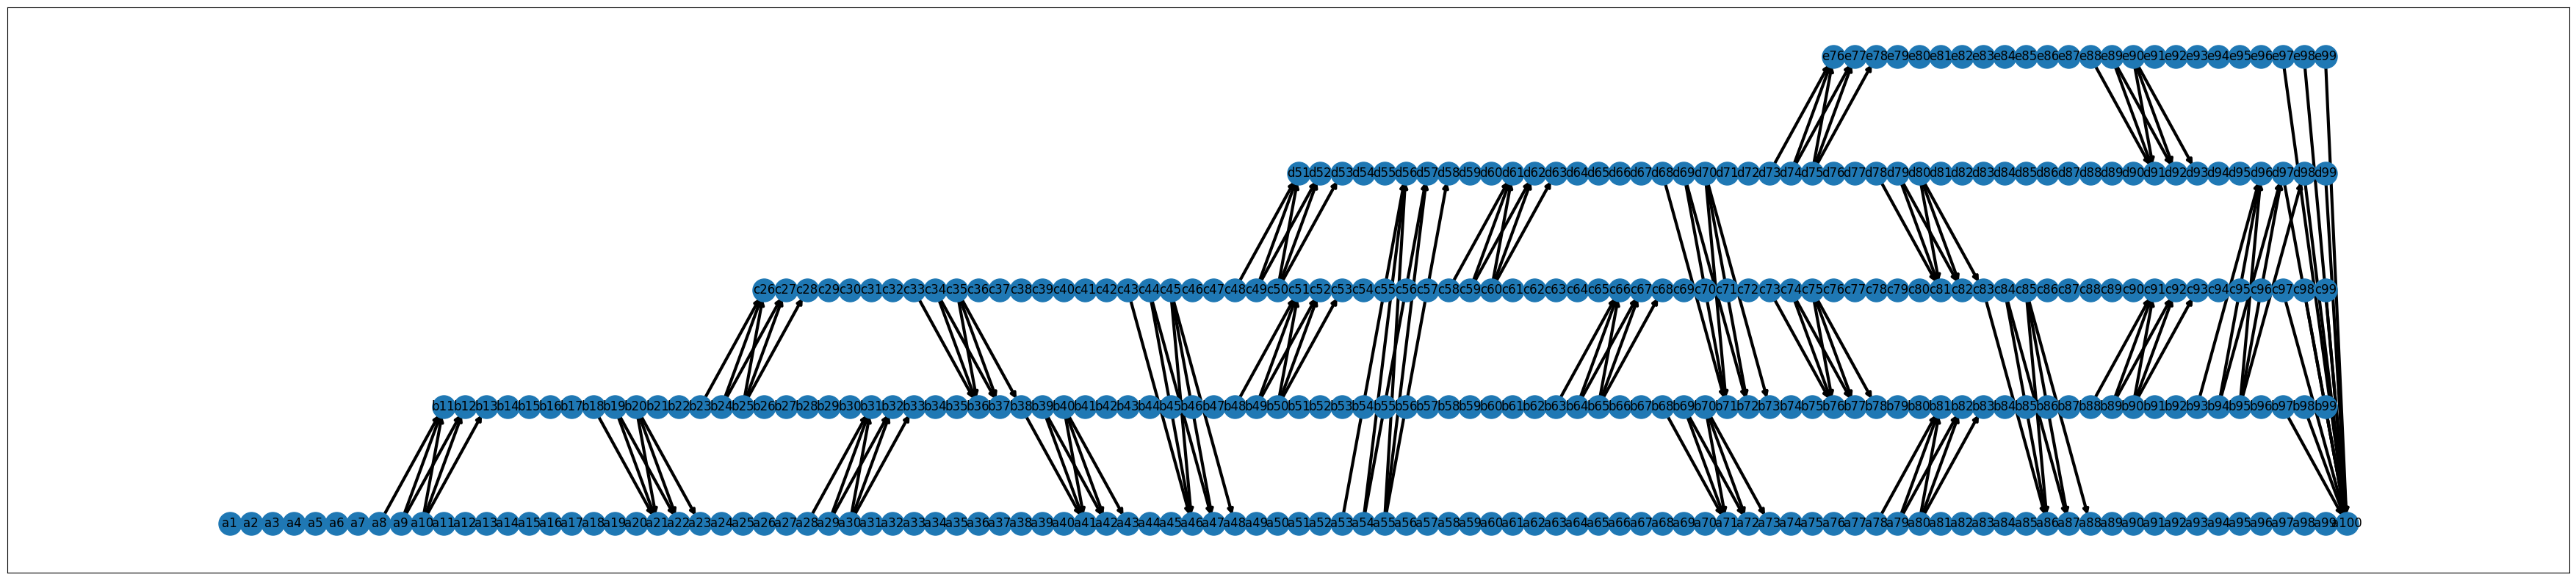

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [45, 10]

nx.draw_networkx_nodes(G, pos,node_size=500) #ノードを描画
nx.draw_networkx_edges(G, pos, width=3) #エッジを描画
nx.draw_networkx_labels(G, pos) #（ノードの）ラベルを描画

#すごろくに見立てたノードを表示
plt.show()